# 1.0 正規分布（normal distribution）について

2つのパラメータ  
平均$\mu$（mean）と分散$\sigma^2$（variance）  
このとき$\sigma$を標準偏差（standard deviation）という  
$N(\mu,\sigma^2)$と表記  
$f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$  

特に$N(0,1)$を標準正規分布（the standard normal distribution）という。

$0-1\sigma > 34.1\%$  
$1-2\sigma > 13.6\%$  
$2-3\sigma > 2.1\%$  
$3\sigma- > 0.2\%$  

そのグラフを描いてみよう！

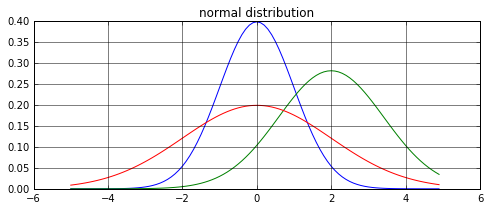

In [3]:
%matplotlib inline
%config inlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

# use np.exp for array
def normal_distribution(mu, sig2, x):
    return np.exp(-(x-mu)**2 / (2*sig2)) / np.sqrt(2*np.math.pi*sig2)

x = np.arange(-5, 5, 0.1)
y1 = normal_distribution(0, 1, x)
y2 = normal_distribution(2, 2, x)
y3 = normal_distribution(0, 4, x)

plt.rcParams["figure.figsize"] = (8,3)
plt.title('normal distribution')
plt.grid(which='major',color='black',linestyle='-')    
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.show()

# 1.1 正規分布のパラメータをデータから推定する  
$\hat{\mu}= \frac{1}{n}\sum{x_i}$  
$\hat{\sigma^2}=\frac{1}{n-1}\sum{(x_i-\hat{\mu})^2}$



mu= 14.0051  sig2= 11.7212512025  sig= 3.42363128893


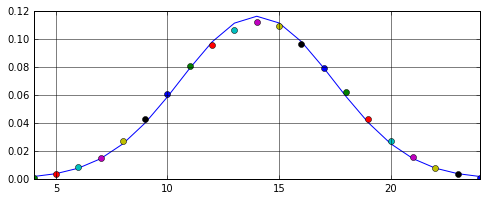

In [4]:
#サイコロを12回振ってその合計が何になるか？
#それを100000回試してみてグラフにする。
M = 4
N = 100000
data = np.zeros(M*6+1, dtype=int)
for i in range(N):
    a = 0;
    for j in range(M):
        a = a + np.random.randint(1, 7)
    data[a] = data[a] + 1

#平均と分散を推定してみる
mu = 0.0
for i in range(data.size):
    if data[i] != 0:
        mu = mu + i * data[i]
mu = mu / N
sig2 = 0.0
for i in range(data.size):
    if data[i] != 0:
        sig2 = sig2 + (i - mu)**2 * data[i]
sig2 = sig2 / (N - 1)
print('mu=', mu, ' sig2=', sig2, ' sig=', np.sqrt(sig2))    

x = np.arange(M, M*6+1, 1)
y = normal_distribution(mu, sig2, x)

# 表示する
plt.rcParams["figure.figsize"] = (8,3)
plt.grid(which='major',color='black',linestyle='-')    
plt.xlim(M, M*6)
plt.plot(x, y)
for i in range(data.size):
    if data[i] != 0:
        plt.plot(i, data[i] / N, 'o')
plt.show()


# 2.0 ポアソン分布（poisson distribution）について

ある一定の間隔（時間や距離）に平均で$\lambda$回起きる事象がある。  
そのときに丁度$k$回起こる離散確率分布をあらわす。  
例えば平均で２年に一回起こる事象がある。この時に８年で何回起こるかを推定する場合、８年では平均で４回起こるはずなので$\lambda=4$のポアソン分布で推定すれば良い。  
同様に１年で何回起こるかを推定する場合は、１年では0.5回起こるはずなので、$\lambda=0.5$のポアソン分布で推定すれば良い。  
距離の場合の例を示すと、例えばガソリンスタンドが平均２キロ毎に１軒あるものとする。この場合に４キロ行く時に何軒のガソリンスタンドがあるだろうか？  
それを推定する場合は$\lambda=2$のポアソン分布で推定すれば良いのだ。  
後のグラフではっきりするが、０軒の場合は約１５％ほどになる。給油するかどうかはあなたの判断にまかせる。

1つのパラメータ  
生起間隔$\lambda$  
$P(X=k)=\frac{\lambda^k e^{-\lambda}}{k!}$  

平均$E(X)$と分散$V(X)$は  
$E(X)=\lambda$  
$V(X)=\lambda$  

そのグラフを描いてみよう！

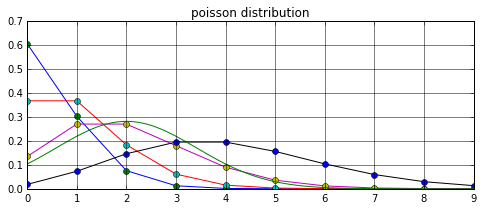

In [8]:
%matplotlib inline
%config inlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

def poisson_distribution(lamda, ks):
    return [lamda**k * np.exp(-lamda) / np.math.factorial(k) for k in ks]

ks = np.arange(0, 9+1, 1)
y1 = poisson_distribution(0.5, ks)
y2 = poisson_distribution(1, ks)
y3 = poisson_distribution(2, ks)
y4 = poisson_distribution(4, ks)
# P(2)をN(2,2)で近似してみる
ks2 = np.arange(0, 9+0.1, 0.1)
y32 = normal_distribution(2, 2, ks2)

plt.rcParams["figure.figsize"] = (8,3)
plt.title('poisson distribution')
plt.grid(which='major',color='black',linestyle='-')    
plt.plot(ks, y1)
plt.plot(ks, y1, 'o')
plt.plot(ks, y2)
plt.plot(ks, y2, 'o')
plt.plot(ks, y3)
plt.plot(ks, y3, 'o')
plt.plot(ks, y4)
plt.plot(ks, y4, 'o')
plt.plot(ks2, y32)
plt.show()

# 3.0 二項分布（binomial distribution）について

生起する確率が独立で$p$の事象がある。  
この場合、$n$回の試行をした時に丁度$k$回生起する離散確率分布をあらわす。  
例えばコインを投げた場合の表の出る確率を0.5とする。  
それを９回繰り返した時に表が何回出るかを推定する場合は$p=0.5,n=9$の二項分布で推定すれば良い。  
同様に用意したインチキコインは表の出る確率が0.2だった。  
それを９回繰り返した時に表が何回出るかを推定する場合は$p=0.2,n=9$の二項分布で推定すれば良い。  

2つのパラメータ  
生起確率$p$  
試行回数$n$  
この二項分布を$B(n,p)$と記述する。  
$P(X=k)=\begin{pmatrix}n\\k\end{pmatrix}p^k (1-p)^{n-k}$  
$\begin{pmatrix}n\\k\end{pmatrix} = n個からk個選ぶ組み合わせ = {}_n C_k = \frac{n!}{k!(n-k)!}$

平均$E(X)$と分散$V(X)$は  
$E(X)=np$  
$V(X)=np(1-p)$  

そのグラフを描いてみよう！

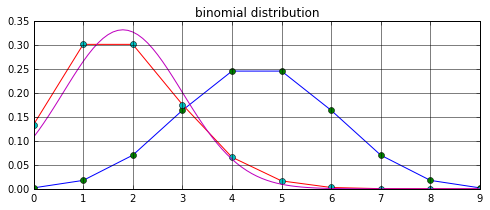

In [16]:
%matplotlib inline
%config inlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

def binomial_distribution(n, p, ks):
    res = []
    for k in ks:
        c = np.math.factorial(n) / \
            (np.math.factorial(k) * np.math.factorial(n - k))
        res.append(c * p**k * (1 - p)**(n - k))
    return res

ks = np.arange(0, 9+1, 1)
y1 = binomial_distribution(9, 0.5, ks)
y2 = binomial_distribution(9, 0.2, ks)
# B(9,0.1)をN(9*0.1,9*0.1*(10-0.1))で近似してみる
ks2 = np.arange(0, 9+0.1, 0.1)
y22 = normal_distribution(9*0.2, 9*0.2*(1.0-0.2), ks2)

plt.rcParams["figure.figsize"] = (8,3)
plt.title('binomial distribution')
plt.grid(which='major',color='black',linestyle='-')    
plt.plot(ks, y1)
plt.plot(ks, y1, 'o')
plt.plot(ks, y2)
plt.plot(ks, y2, 'o')
plt.plot(ks2, y22)

plt.show()

# 3.1 二項分布（binomial distribution）の例

ある製品を生産するが、1個あたりの不良品率が0.05であったとする。  
大量に生産しているこの製品から無作為に100個を選んでチェックをする。  
この時に不良品が２個以上である確率を求めてみよう。  
また、何個の不良品が出るか、その期待値を求めてみよう。  
これを推定するには$p=0.05, n=100$の二項分布で推定すれば良い。  
２個以上の不良品率はkを2以上の確率を全て加算すれば求められる。  
期待値は個数と確率を掛けたものを全て合算すれば良い。

そのグラフを描いてみよう！  
そして答えを求めてみよう！

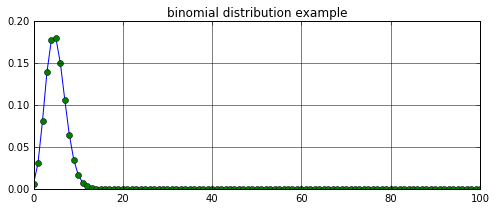

２個以上の不良品率= 0.962918790673
不良品個数の期待値= 5.0
推定平均np= 5.0
推定分散np(1-p)= 4.75
推定標準偏差sqrt(np(1-p))= 2.179449471770337


In [15]:
ks = np.arange(0, 100+1, 1)
y = binomial_distribution(100, 0.05, ks)
#yn = normal_distribution(100*0.05, 100*0.05*(1-0.05), ks)

plt.rcParams["figure.figsize"] = (8,3)
plt.title('binomial distribution example')
plt.grid(which='major',color='black',linestyle='-')    
plt.plot(ks, y)
plt.plot(ks, y, 'o')
#plt.plot(ks, yn)
plt.show()

pp = 0.0
for k in ks[2:]:
    pp = pp + y[k]
print('２個以上の不良品率=', pp)

pe = 0.0
for k in ks:
    pe = pe + k * y[k]
print('不良品個数の期待値=', pe)

print('推定平均np=', 100*0.05)
print('推定分散np(1-p)=', 100*0.05*(1.0-0.05))
print('推定標準偏差sqrt(np(1-p))=', np.math.sqrt(100*0.05*(1.0-0.05)))

# 3.2 二項分布（binomial distribution）の例

ある珈琲のブレンドは2種の豆を1対1で混ぜて大きな袋に保存している。  
その袋から無作為に100粒を選んで1杯の珈琲を淹れる。  
この時に2種の豆の差が10未満であれば良いブレンド珈琲を飲むことができる。  
その確率を求めてみよう。  
これを推定するには$p=0.5, n=100$の二項分布で推定すれば良い。  
46以上54以下となる確率を全て加算すれば求められる。  

そのグラフを描いてみよう！  
そして答えを求めてみよう！

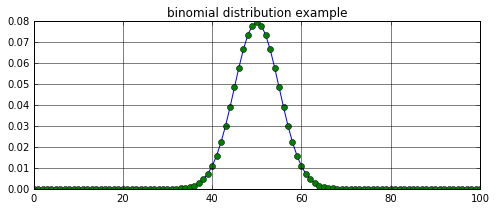

良いブレンドを飲める確率= 0.631798382673


In [14]:
ks = np.arange(0, 100+1, 1)
y = binomial_distribution(100, 0.5, ks)
#yn = normal_distribution(100*0.5, 100*0.5*(1-0.5), ks)

plt.rcParams["figure.figsize"] = (8,3)
plt.title('binomial distribution example')
plt.grid(which='major',color='black',linestyle='-')    
plt.plot(ks, y)
plt.plot(ks, y, 'o')
#plt.plot(ks, yn)
plt.show()

pp = 0.0
for k in ks[46:55]:
    pp = pp + y[k]
print('良いブレンドを飲める確率=', pp)



# 3.3 二項分布（binomial distribution）を正規分布で考える例

二項分布の$n$が大きい時は二項分布の代わりに正規分布を使うこともできる。  
先の問題を正規分布に当てはめて考えてみよう。  

二項分布の平均$E(X)$と分散$V(X)$は  
$E(X)=np$  
$V(X)=np(1-p)$  
だったよね？  

そのグラフを描いてみよう！  
そして答えを求めてみよう！

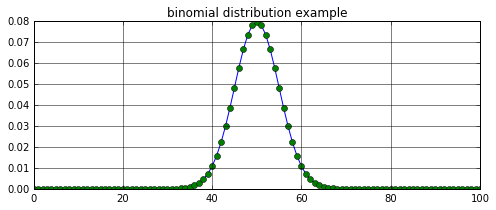

良いブレンドを飲める確率= 0.632680052053


In [13]:
ks = np.arange(0, 100+1, 1)
y = normal_distribution(100*0.5, 100*0.5*(1-0.5), ks)

plt.rcParams["figure.figsize"] = (8,3)
plt.title('binomial distribution example')
plt.grid(which='major',color='black',linestyle='-')    
plt.plot(ks, y)
plt.plot(ks, y, 'o')
#plt.plot(ks, yn)
plt.show()

pp = 0.0
for k in ks[46:55]:
    pp = pp + y[k]
print('良いブレンドを飲める確率=', pp)